In [4]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
from scipy.stats import skew, kurtosis

df= pd.read_csv("cleaned_HR_data.csv")
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MonthlyIncome

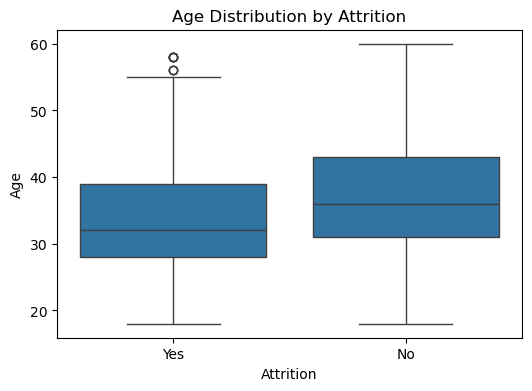

In [7]:
#Relationship between attrition and variables like Age, Department, Overtime, PerformanceRating.

plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.show()


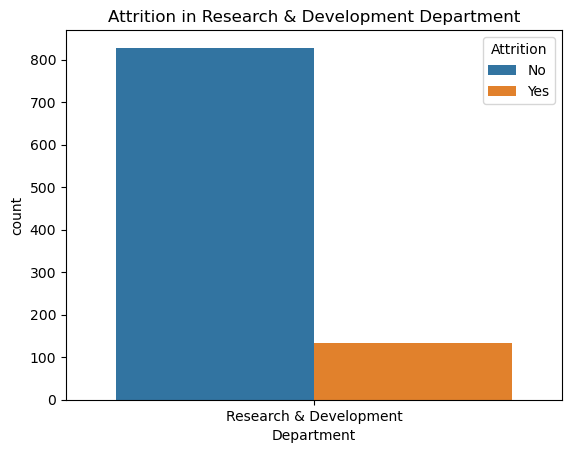

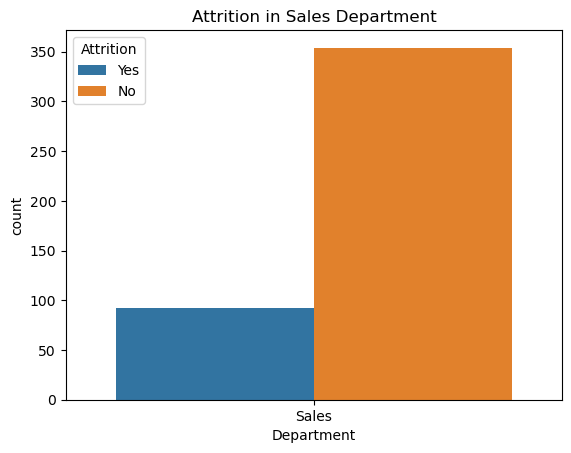

In [8]:
#Department vs Attrition (using encoded column names)
department_cols = ['Department_Research & Development', 'Department_Sales']

for dept in department_cols:
    df_temp = df[[dept, 'Attrition']].copy()
    df_temp['Department'] = dept.split('_')[1]
    df_temp = df_temp[df_temp[dept] == 1]

    sns.countplot(x='Department', hue='Attrition', data=df_temp)
    plt.title(f'Attrition in {dept.split("_")[1]} Department')
    plt.show()


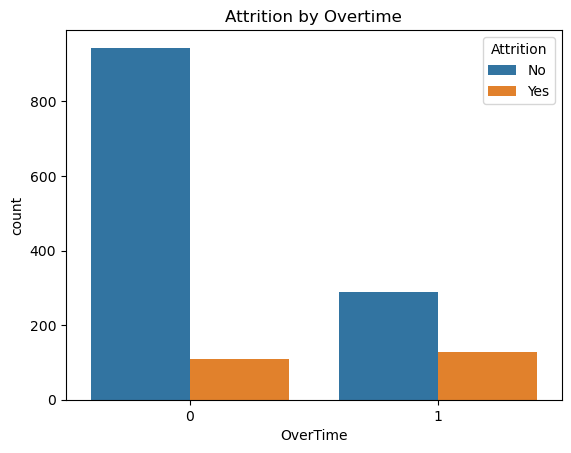

In [9]:
#Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by Overtime")
plt.show()


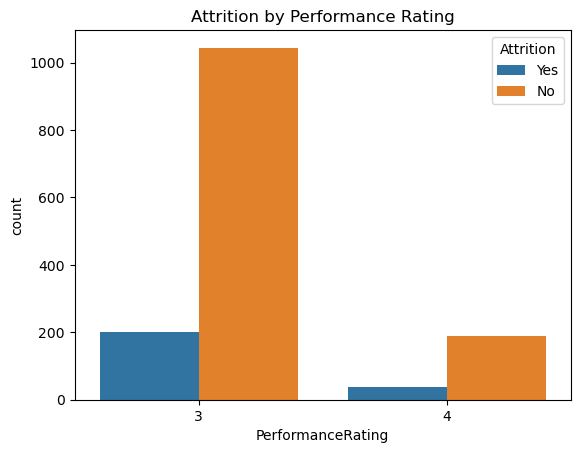

In [10]:
# PerformanceRating vs Attrition
sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
plt.title("Attrition by Performance Rating")
plt.show()


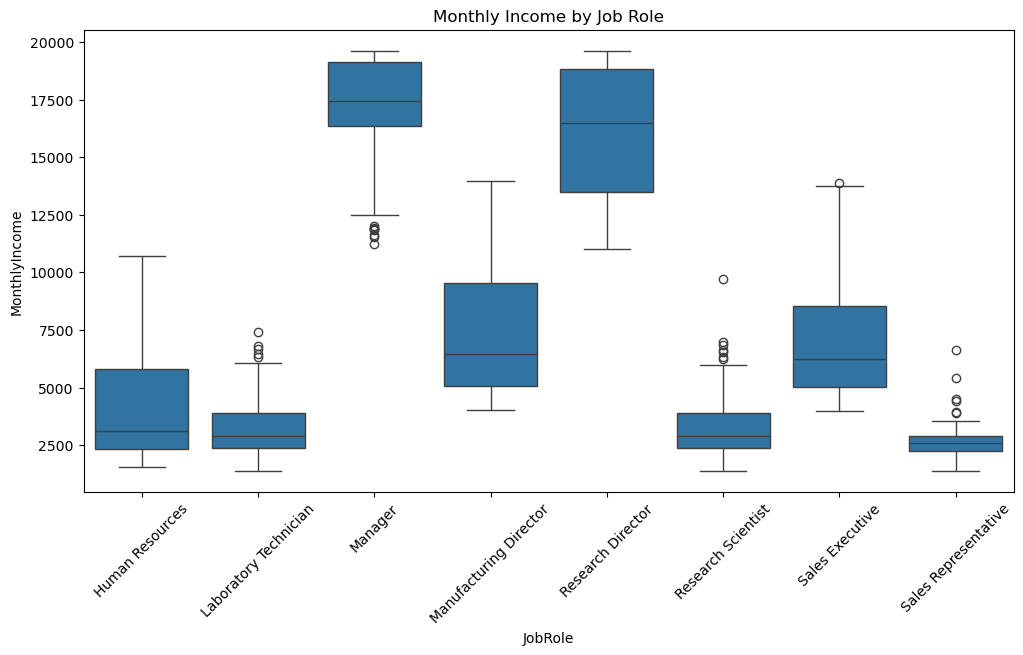

In [11]:
#2. Monthly Income vs JobRole / YearsAtCompany
# Monthly Income vs JobRole (encoded columns)
job_roles = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician',
    'JobRole_Manager', 'JobRole_Manufacturing Director',
    'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative'
]

melted = pd.DataFrame()

for role in job_roles:
    temp = df[df[role] == 1].copy()
    temp['JobRole'] = role.split('_')[1]
    melted = pd.concat([melted, temp])

plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=melted)
plt.title("Monthly Income by Job Role")
plt.xticks(rotation=45)
plt.show()


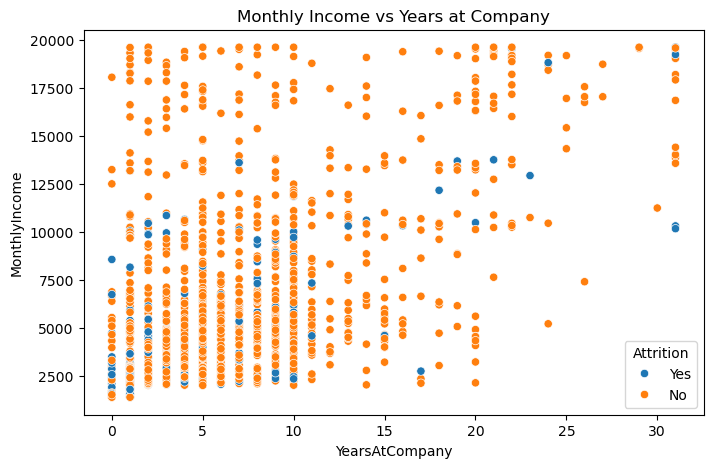

In [12]:
#Monthly Income vs YearsAtCompany
plt.figure(figsize=(8,5))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', data=df)
plt.title("Monthly Income vs Years at Company")
plt.show()


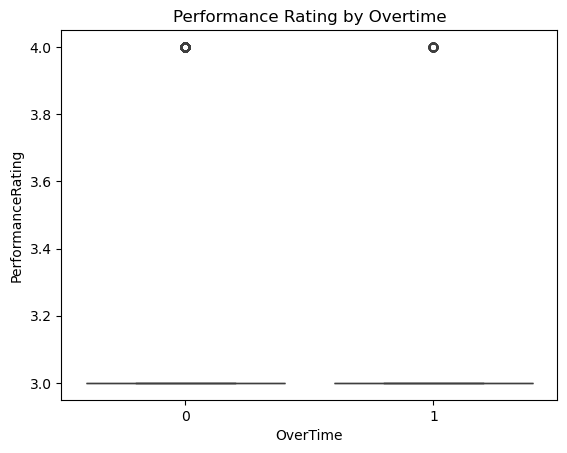

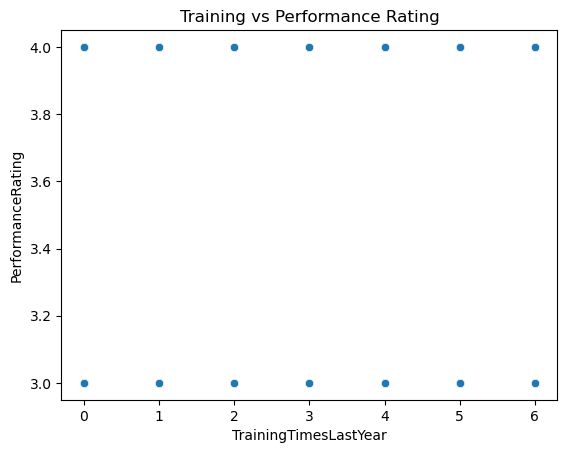

In [13]:
#3. Performance vs Overtime, TrainingTimesLastYear 
#PerformanceRating vs Overtime
sns.boxplot(x='OverTime', y='PerformanceRating', data=df)
plt.title("Performance Rating by Overtime")
plt.show()


#TrainingTimesLastYear vs PerformanceRating
sns.scatterplot(x='TrainingTimesLastYear', y='PerformanceRating', data=df)
plt.title("Training vs Performance Rating")
plt.show()


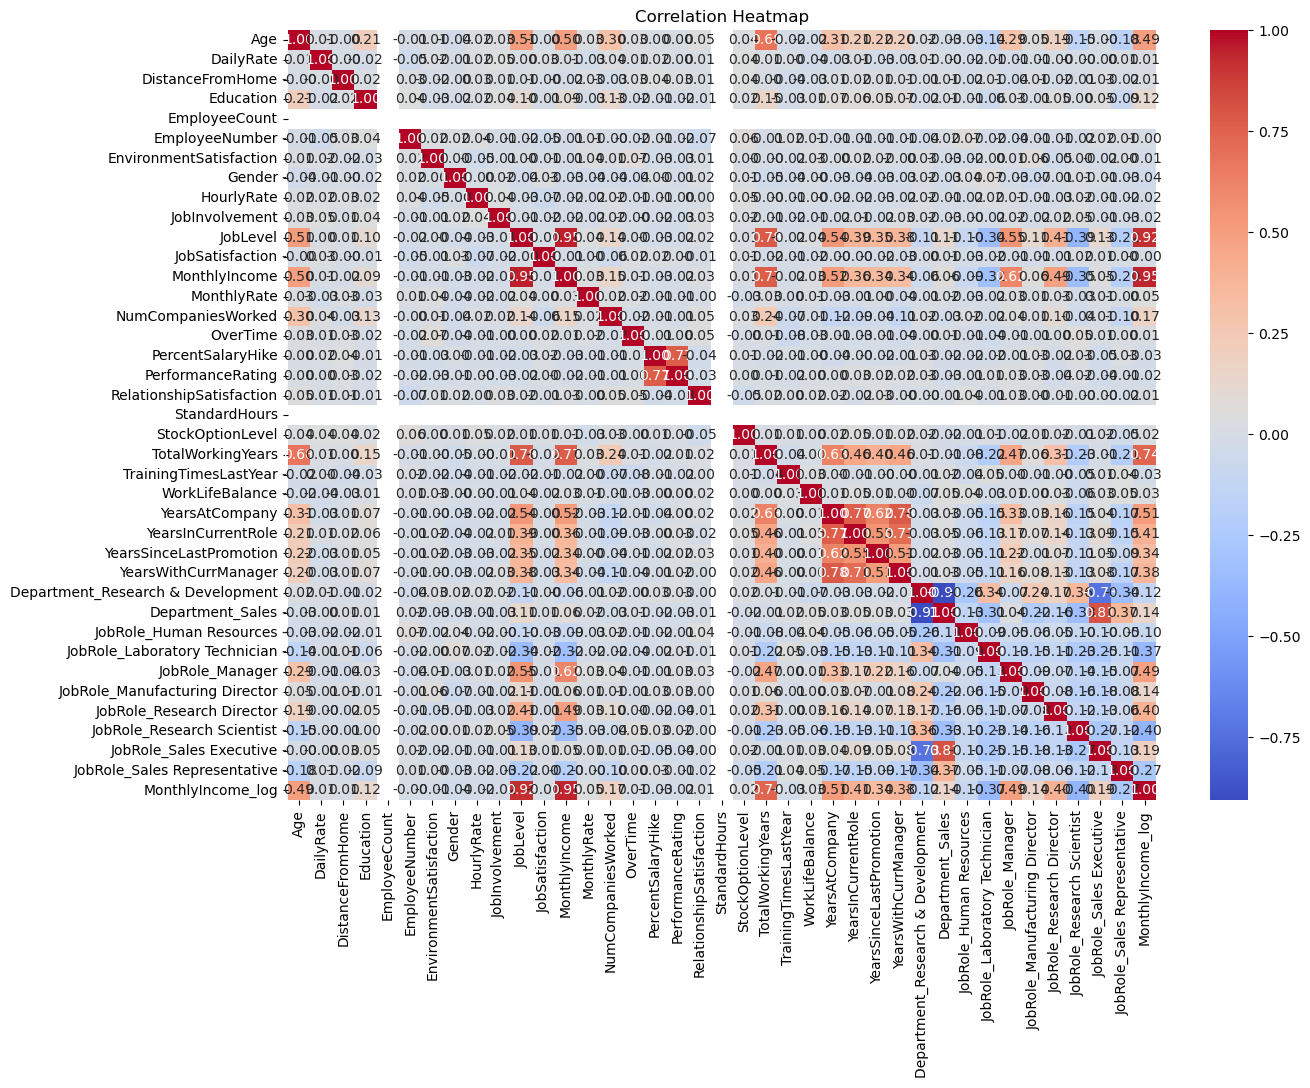

In [17]:
# 4. Correlation Heatmap (for numerical variables)
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# Statistical & Predictive Insights

In [22]:
# Encode Attrition to binary
df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Pearson correlation
pearson_corr = df[numeric_cols].corr(method='pearson')

# Top correlations with PerformanceRating
print("Top features correlated with PerformanceRating:")
print(pearson_corr['PerformanceRating'].sort_values(ascending=False).head(10))

# Top correlations with Attrition
print("\nTop features correlated with Attrition:")
print(pearson_corr['Attrition_binary'].sort_values(ascending=False).head(10))

# Spearman correlation
spearman_corr = df[numeric_cols].corr(method='spearman')

print("\nSpearman correlation with PerformanceRating:")
print(spearman_corr['PerformanceRating'].sort_values(ascending=False).head(10))

print("\nSpearman correlation with Attrition:")
print(spearman_corr['Attrition_binary'].sort_values(ascending=False).head(10))




Top features correlated with PerformanceRating:
PerformanceRating          1.000000
PercentSalaryHike          0.773550
YearsInCurrentRole         0.034986
DistanceFromHome           0.027110
YearsWithCurrManager       0.022827
YearsSinceLastPromotion    0.017896
TotalWorkingYears          0.006744
OverTime                   0.004369
YearsAtCompany             0.003914
StockOptionLevel           0.003506
Name: PerformanceRating, dtype: float64

Top features correlated with Attrition:
Attrition_binary      1.000000
OverTime              0.246118
DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
Gender                0.029453
MonthlyRate           0.015170
PerformanceRating     0.002889
HourlyRate           -0.006846
EmployeeNumber       -0.010577
PercentSalaryHike    -0.013478
Name: Attrition_binary, dtype: float64

Spearman correlation with PerformanceRating:
PerformanceRating       1.000000
PercentSalaryHike       0.628519
YearsInCurrentRole      0.032719
YearsWithCurrMana

In [24]:
# 2. Comparative Testing
#T-Test for Numerical Features by Attrition 
from scipy.stats import ttest_ind

def t_test_by_attrition(numeric_feature):
    group_yes = df[df['Attrition'] == 'Yes'][numeric_feature]
    group_no = df[df['Attrition'] == 'No'][numeric_feature]
    t_stat, p = ttest_ind(group_yes, group_no)
    print(f"T-test on {numeric_feature} by Attrition: p-value = {p:.4f}")

t_test_by_attrition('MonthlyIncome')
t_test_by_attrition('Age')
t_test_by_attrition('YearsAtCompany')



T-test on MonthlyIncome by Attrition: p-value = 0.0000
T-test on Age by Attrition: p-value = 0.0000
T-test on YearsAtCompany by Attrition: p-value = 0.0000


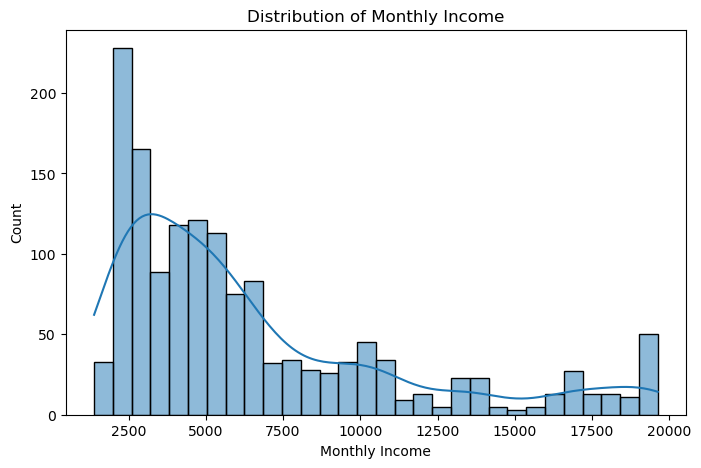

In [32]:
#Visualization Deliverables 
# Distribution of MonthlyIncome 
plt.figure(figsize=(8,5))
sns.histplot(df['MonthlyIncome'], kde=True, bins=30)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()


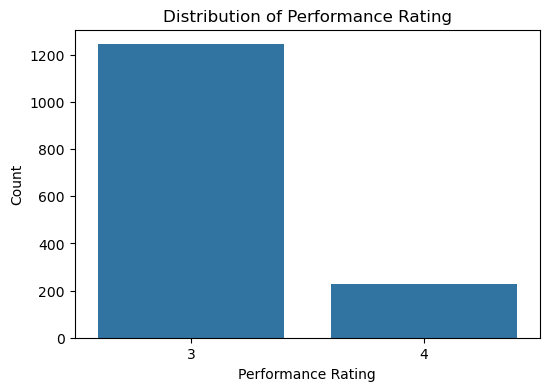

In [33]:
#Distribution of PerformanceRating 
plt.figure(figsize=(6,4))
sns.countplot(x='PerformanceRating', data=df)
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()


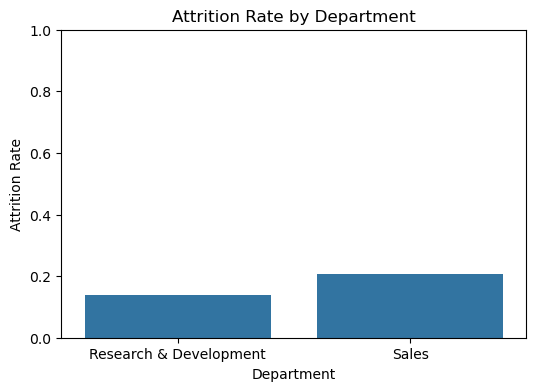

In [34]:
#Bar Plots: Attrition and Performance Across Categories 
department_cols = ['Department_Research & Development', 'Department_Sales']
attrition_data = []

for col in department_cols:
    dept_name = col.split('_')[1]
    temp = df[df[col] == 1]
    count = temp['Attrition'].value_counts(normalize=True)
    attrition_data.append({'Department': dept_name, 'Attrition_Yes': count.get('Yes', 0)})

attr_df = pd.DataFrame(attrition_data)

plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='Attrition_Yes', data=attr_df)
plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate')
plt.ylim(0, 1)
plt.show()


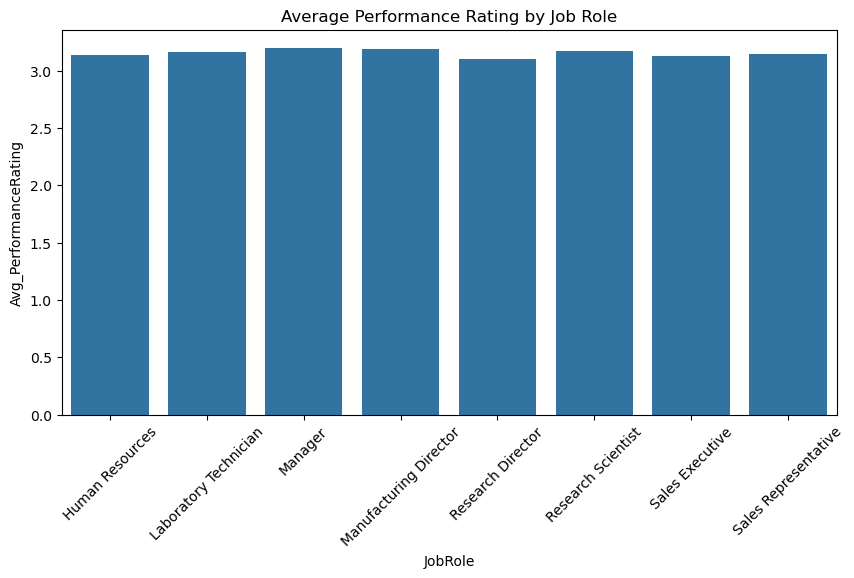

In [35]:
# PerformanceRating by JobRole 
job_roles = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician',
    'JobRole_Manager', 'JobRole_Manufacturing Director',
    'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative'
]

perf_data = []

for role in job_roles:
    role_name = role.split('_')[1]
    temp = df[df[role] == 1]
    avg_perf = temp['PerformanceRating'].mean()
    perf_data.append({'JobRole': role_name, 'Avg_PerformanceRating': avg_perf})

perf_df = pd.DataFrame(perf_data)

plt.figure(figsize=(10,5))
sns.barplot(x='JobRole', y='Avg_PerformanceRating', data=perf_df)
plt.title('Average Performance Rating by Job Role')
plt.xticks(rotation=45)
plt.show()


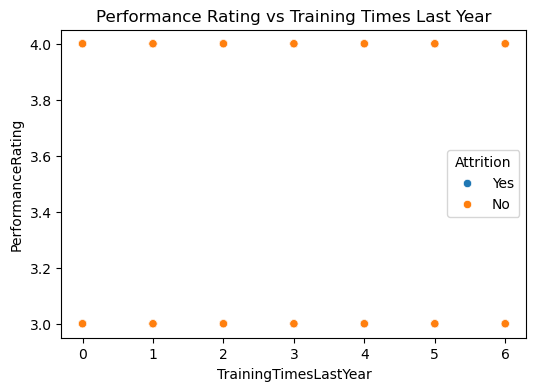

In [36]:
#3. Scatter Plots 
# PerformanceRating vs TrainingTimesLastYear 
plt.figure(figsize=(6,4))
sns.scatterplot(x='TrainingTimesLastYear', y='PerformanceRating', hue='Attrition', data=df)
plt.title('Performance Rating vs Training Times Last Year')
plt.show()


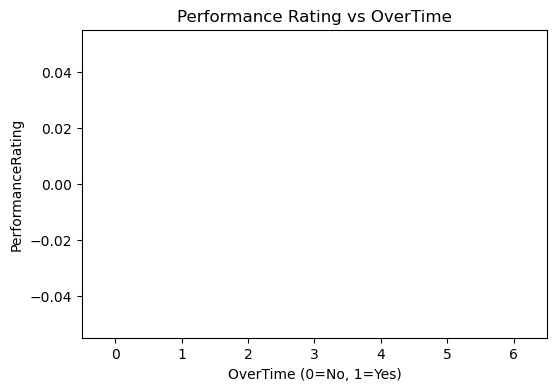

In [37]:
#PerformanceRating vs OverTime (Yes=1, No=0) 
df['OverTime_binary'] = df['OverTime'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(6,4))
sns.stripplot(x='OverTime_binary', y='PerformanceRating', data=df, jitter=True)
plt.title('Performance Rating vs OverTime')
plt.xlabel('OverTime (0=No, 1=Yes)')
plt.show()
